# Project 05: COVID-19 Dataset Exploratory Data Analysis (EDA)

## Overview
In this project, we analyze a COVID-19 dataset to understand the trends, patterns, and impact of the pandemic using Python's data analysis libraries.

## Objective
- Load and explore the COVID-19 dataset.
- Perform data cleaning.
- Visualize trends in cases, deaths, and recoveries.
- Analyze countries most affected.
- Understand time-based progression of the pandemic.


## Step 1: Importing necessary libraries
We import Pandas for data manipulation, Seaborn and Matplotlib for visualizations.



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="darkgrid")

## Step 2: Load Dataset

We load the COVID-19 dataset directly from a web URL using pandas.


In [15]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'
covid_df = pd.read_csv(url)
covid_df


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462


## Step 3: Dataset Info

We inspect column names, data types, and null values to understand the structure.



In [16]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB


## Step 4: Missing Values

We check if there are any null or missing values that require handling.

In [17]:
covid_df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

## Step 5: Convert Date Column

We convert the `Date` column to datetime format to facilitate time-series analysis.


In [18]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'])
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB


## Step 6: Global Aggregation

We group the dataset by `Date` to track total global numbers for Confirmed and Deaths.


In [19]:
global_daily = covid_df.groupby('Date').sum().reset_index()
global_daily.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,557,30,17
1,2020-01-23,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,657,32,18
2,2020-01-24,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,944,39,26
3,2020-01-25,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,1437,42,42
4,2020-01-26,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,2120,56,56


## Step 7: Time-Series Plot of Global Cases

This line plot shows how COVID-19 confirmed and death counts evolved globally over time.


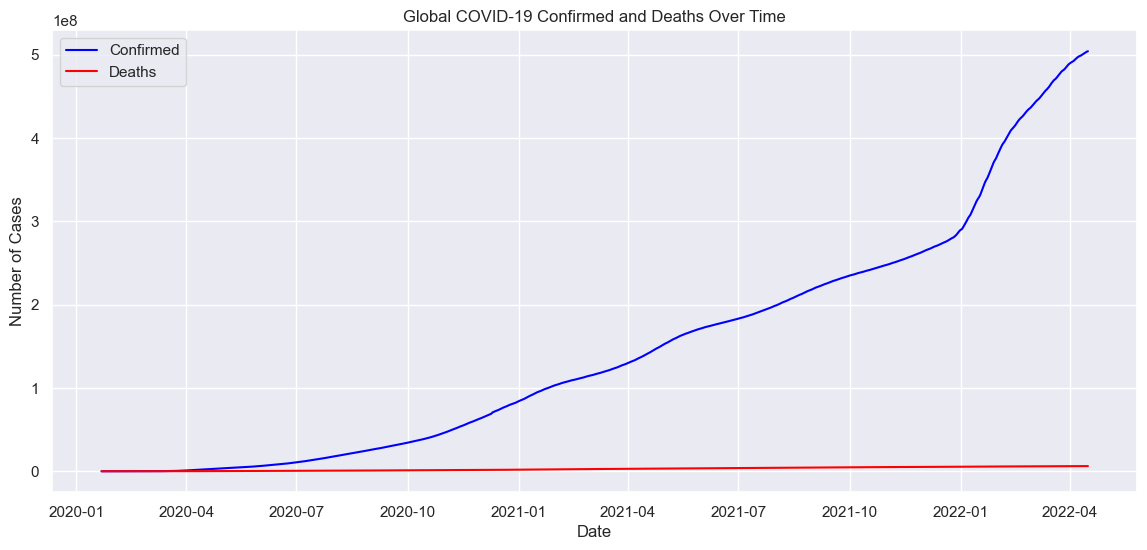

In [20]:
plt.figure(figsize=(14,6))
plt.plot(global_daily['Date'], global_daily['Confirmed'], label='Confirmed', color='blue')
plt.plot(global_daily['Date'], global_daily['Deaths'], label='Deaths', color='red')
plt.title('Global COVID-19 Confirmed and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


## Step 8: Latest Country-wise Summary

We isolate data from the most recent date and sort countries by total confirmed cases.


In [24]:
latest = covid_df[covid_df['Date'] == covid_df['Date'].max()]
latest_sorted = latest.sort_values(by='Confirmed', ascending=False).head(15)
latest_sorted[['Country', 'Confirmed', 'Deaths']]

,Country,Confirmed,Deaths
150143,US,80625120,988609
66095,India,43042097,521751
20399,Brazil,30250077,662185
52223,France,27874269,145159
55487,Germany,23416663,132942
153407,United Kingdom,21916961,172014
119135,Russia,17801103,365774
76703,"Korea, South",16305752,21092
70991,Italy,15659835,161602
149327,Turkey,14991669,98551


## Step 9: Top 15 Countries

This horizontal bar chart visualizes the 15 most affected countries by confirmed case count.


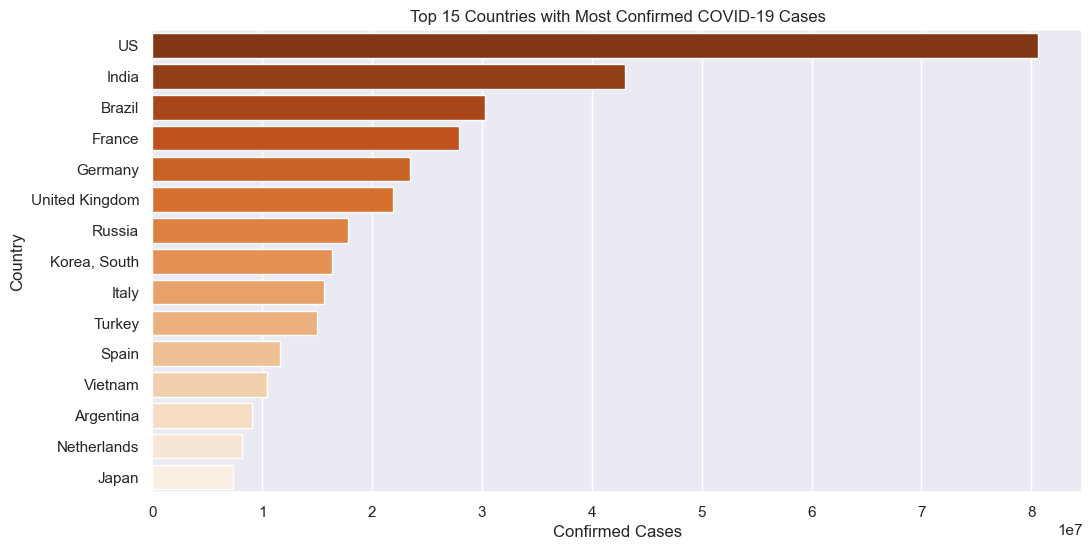

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x='Confirmed', y='Country',hue='Country', data=latest_sorted, palette='Oranges_r',dodge=False, legend=False)
plt.title('Top 15 Countries with Most Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()


## Step 10: Death Rate Calculation

We calculate the death rate as:  
**Death Rate = (Deaths / Confirmed) × 100**


In [31]:
latest_sorted['Death Rate (%)'] = (latest_sorted['Deaths'] / latest_sorted['Confirmed']) * 100
latest_sorted[['Country', 'Death Rate (%)']]

,Country,Death Rate (%)
150143,US,1.226180
66095,India,1.212188
20399,Brazil,2.189036
52223,France,0.520763
55487,Germany,0.567724
153407,United Kingdom,0.784844
119135,Russia,2.054783
76703,"Korea, South",0.129353
70991,Italy,1.031952
149327,Turkey,0.657372


## Step 11: Visualize Death Rates

This chart shows which countries had the highest COVID-19 death rates relative to their confirmed cases.

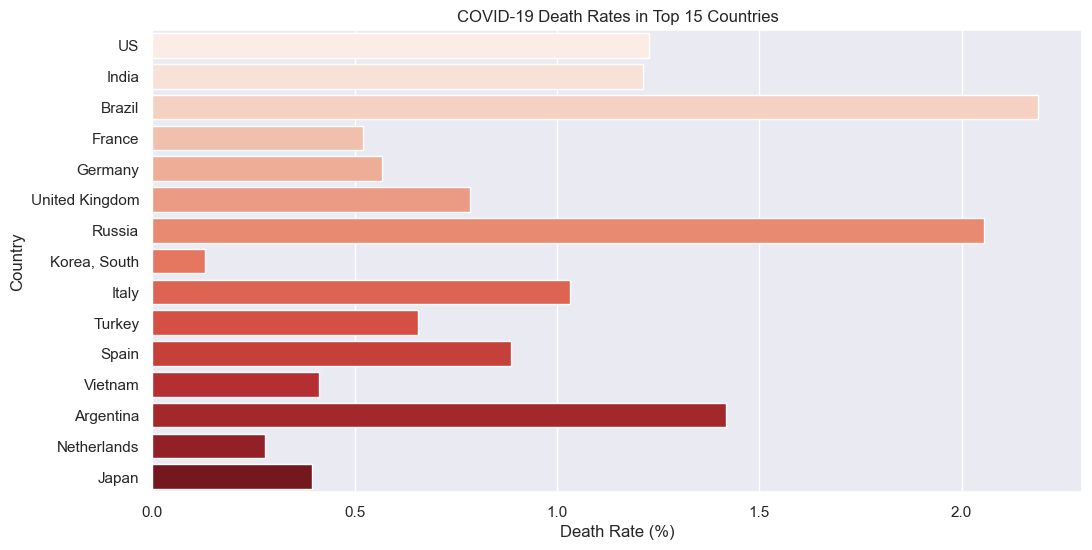

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x='Death Rate (%)', y='Country',hue='Country', data=latest_sorted, palette='Reds',legend=False, dodge=False)
plt.title('COVID-19 Death Rates in Top 15 Countries')
plt.xlabel('Death Rate (%)')
plt.ylabel('Country')
plt.show()
